# mzfit
zfit wrapper for lazy analysits [GitHub](https://github.com/mzks/mzfit)

Author: Keita Mizukoshi (Kobe Univ. mzks@stu.kobe-u.ac.jp, @mzks)

## Concept

 - Easy and less-typing
 - Visualization
 
[`zfit`](https://github.com/zfit/zfit) is a nice fitting tools on python, built on object-oriented interface.
However, I would sometime like to fit easily. I do *not always* want to care minimizers and cost function.
I usually take an approach for good fitting, try-error-retry with visual environment.
For that purpose, raw `zfit` is slightly much.
To prevent tenosynovitis of lazy analysts, I made a wrapper of `zfit`, `mzfit`

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# generate sample data
data = np.random.normal(11, 4, 10000)

In [4]:
import mzfit

In [5]:
mzfit.__version__

'0.1'

In [6]:
# Quick course 
mzfit.help()


    Welcome to mzfit!

    Fitting 4 steps on mzfit,

    Step 1 : Load data and make fitter
    `zf = mzfit.zf(data)`

    Step 2 : Make model and initial parameters
    ```
    zf.set_model('gauss') 
    zf.set_parameter('mu', 11)
    zf.set_parameter('sigma', 3)
    ```
    or,
    ```
    from zfit import z
    def user_func(x, mu=10, sigma=1, C=1):
        return z.exp(-z.square((x - mu) / sigma)) + C
    zf.set_model_func(user_func)
    ```

    Step 3 : Visualize
    `zf.draw()`
    If it is not nice, repeat step 2.

    Step 4 : Fit
    ```
    zf.fit()
    zf.draw()
    zf.result
    ```
    


### Step 1 : Load data and fitter (zf)

In [7]:
zf = mzfit.zf(data)

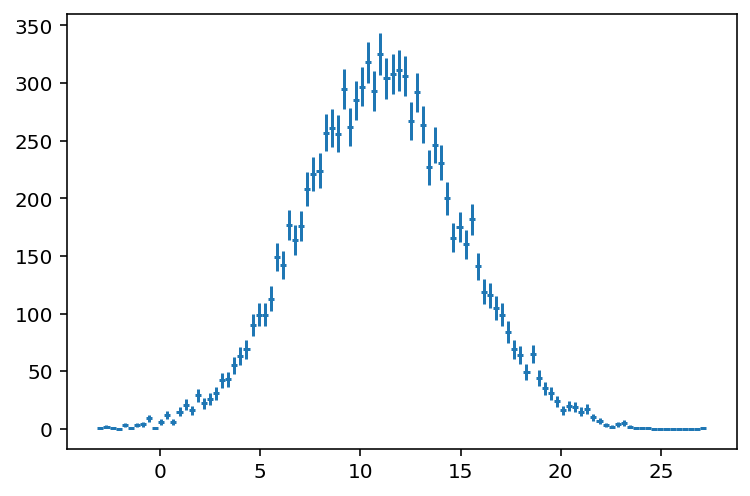

In [8]:
# If you want, number of bins and ranges can be set.
#zf.set_bins(200) # Number of bins
#zf.set_data_range(0, 25) # Range for data
#zf.set_range(5, 15) # Range for fitting

# Let's visualize! zfitter always provides `draw()` to visualize even before definition of model.
zf.draw()

### Model

In [9]:
zf.set_model('gauss') 
# I would like to use gaussian.
# This is a str-style to set model.
# It will support for other style (Object, str+str, ...), user will be able to find their model freely.
# User defined model with python function has been inplemented.

# By the way,... which parameters can be used? This method prints parameter list.

Parameters
mu : 0.0
sigma : 1.0


/Users/mzks/.pyenv/versions/3.7.9/lib/python3.7/site-packages/mzfit/core.py:154: UserWarning: The function <function Space.area at 0x14cd74950> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[-3.13560444]]), array([[27.25127856]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  scale_factor = n_sample/self.fit_bins*self.obs.area()


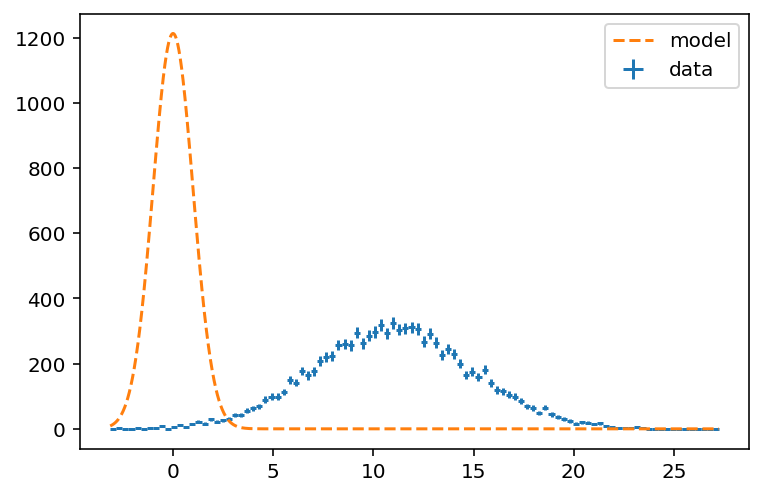

In [10]:
# Before fitting
zf.draw(); # Always can be used!
plt.legend()
# Even before fitting, analysts would like to draw data and model to find good model and initial parameters.

The initial valeues of the model is not good.
Set better values manually and re-draw.

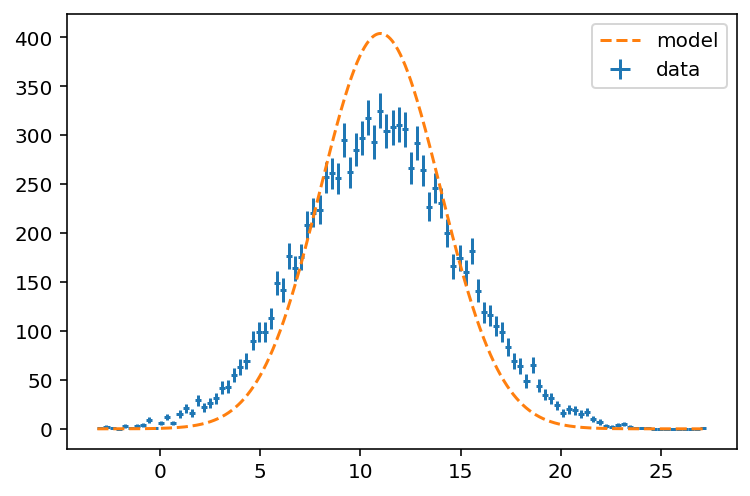

In [11]:
# In the real situation, this statements are written in the upper column, and run many times.
zf.set_parameter('mu', 11)
zf.set_parameter('sigma', 3)
zf.draw()
plt.legend()

# Issue: zfit doesn't provide way to overload Parameters themselves.
# The current zfitter doesn't support to set lower and upper limit, and step_size.

This is not perfect, but it is enough to fit. The rest work is fitter's one.
If you don't like the initial values, you can go back and re-set parameters.

In [12]:
zf.fit()

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu, sigma]] data=[<zfit.core.data.Data object at 0x150a12950>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 0.00022 │ 57.87       │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
mu        10.97       False
sigma     3.968       False

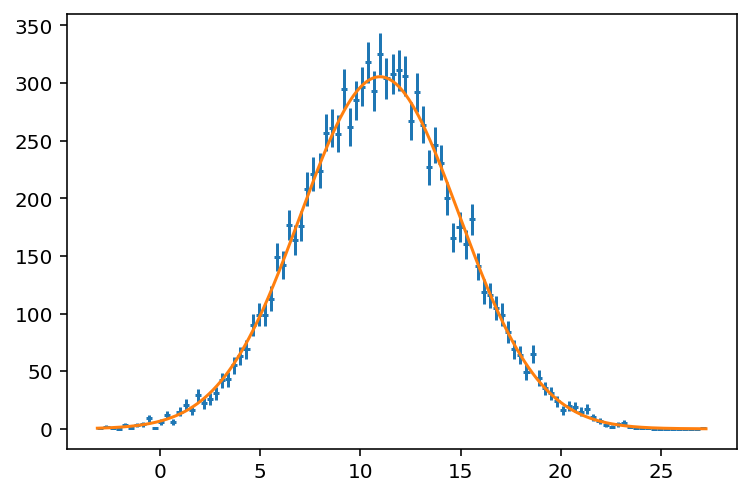

In [13]:
zf.draw()

It looks nice.

## User model

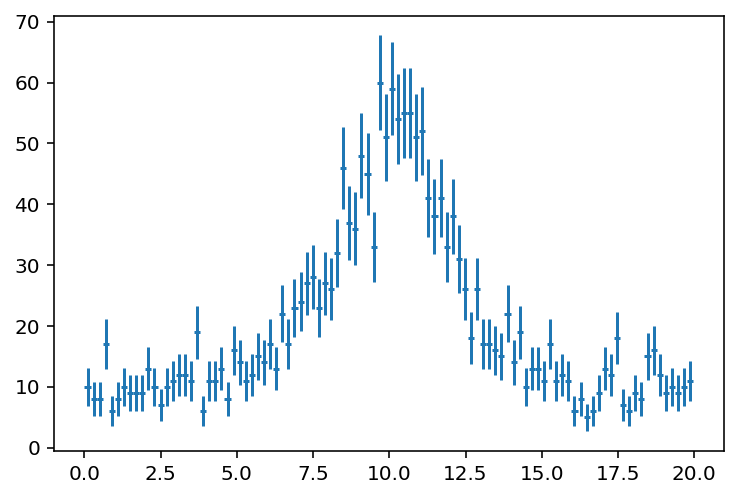

In [15]:
# Data is not on simple gaussian
signal = np.random.normal(10, 2, 1000)
background = np.random.uniform(0, 20, 1000)
data = np.concatenate([signal, background])
zf2 = mzfit.zf(data)
zf2.draw()

In [16]:
# User model as python function
from zfit import z
def user_func(x, mu=10, sigma=1, C=1): # These default arguments are used as initial parameters
    return z.exp(-z.square((x - mu) / sigma)) + C

zf2.set_model_func(user_func) # Only things user have to do is passing the function

Parameters
C : 1.0
mu : 10.0
sigma : 1.0


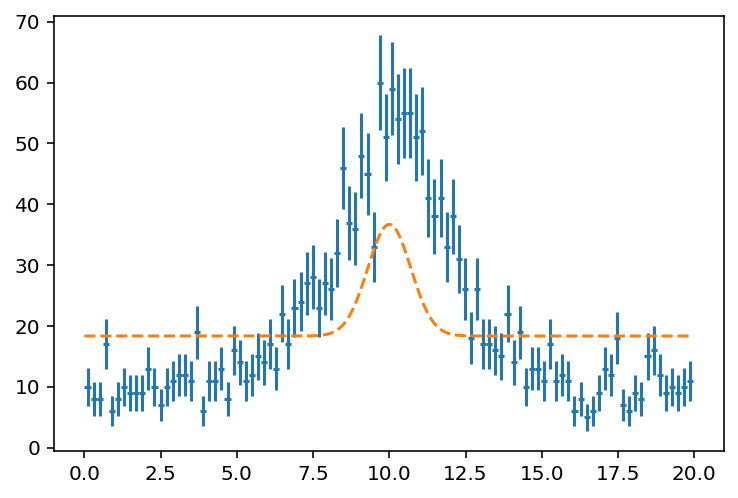

In [17]:
zf2.draw()

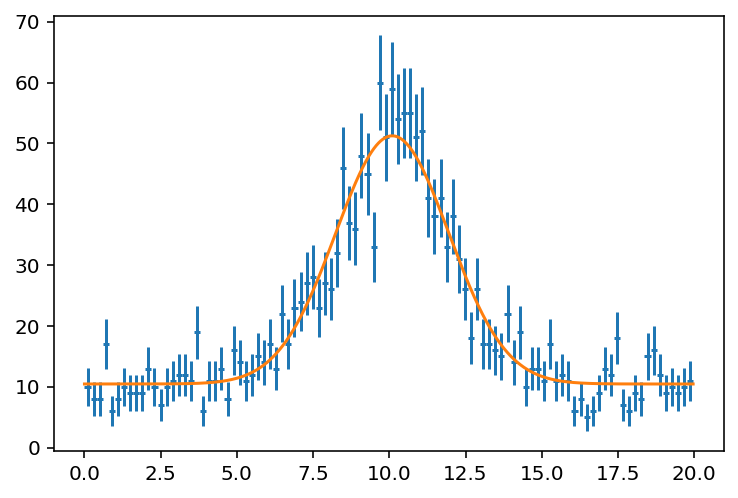

In [18]:
zf2.fit()
zf2.draw()

In [19]:
zf2.result

FitResult of
<UnbinnedNLL model=[<zfit.<class 'mzfit.core.zf.set_model_func.<locals>.UserPDF'>  params=[C, mu, sigma]] data=[<zfit.core.data.Data object at 0x150edf490>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 2.3e-05 │ 768.4       │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
C        0.2565       False
mu         10.1       False
sigma     2.627       False